# Introduction 

L’agriculture constitue l’un des piliers fondamentaux de l’économie togolaise, en particulier dans les zones rurales où elle est la principale source de revenus pour de nombreuses familles. Dans un contexte de croissance démographique et de changements climatiques, il devient crucial d’optimiser la production agricole afin d’assurer la sécurité alimentaire et de soutenir le développement économique.


Avec l’essor des technologies de données et de l’intelligence artificielle, il est désormais possible d’exploiter les données agricoles pour anticiper les rendements et mieux orienter les décisions agricoles. Cette étude s’inscrit dans cette dynamique et vise à développer un modèle de prédiction des quantités de production agricole au Togo, en se basant sur des données collectées en 2022.

# Importation des Librairies pour l'analyse des données 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import os 
import glob
import seaborn as sns

In [2]:
glob.glob("*")

['AgriDataSetTg.xlsx',
 'fews_net_yield_TGO.csv',
 'hvstat_africa_data_v1.0.csv',
 'Predictin_Agri_Togo.ipynb']

In [3]:
df=pd.read_excel('AgriDataSetTg.xlsx')
df.head(5)

,Region,Prefecture,Product,area_planted,quantity_produced
0,Kara,Kozah,Rice,1658.0,2328.0
1,Kara,Dankpen,Rice,2569.0,3597.0
2,Plateaux,Amou,Sorghum,4809.0,6729.0
3,Plateaux,Est-Mono,Maize,48819.0,69205.0
4,Plateaux,Ogou,Maize,60426.0,85200.0


# 1. Analyse Exploratoire

In [4]:
df.shape

(893, 5)

In [5]:
df.describe(include='object')

,Region,Prefecture,Product
count,893,893,893
unique,4,30,13
top,Kara,Kozah,Cassava
freq,279,40,108


In [6]:
df.describe()

,area_planted,quantity_produced
count,893.000000,846.000000
mean,6963.429633,13784.576537
std,10149.491004,23524.443358
min,1.000000,3.860000
25%,845.000000,989.816250
50%,2708.000000,4208.000000
75%,9091.100000,15490.000000
max,112126.000000,180813.000000


In [7]:
df['quantity_produced'].isna().sum()

47

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.describe(include='all')

,Region,Prefecture,Product,area_planted,quantity_produced
count,846,846,846,846.000000,846.000000
unique,4,30,13,NaN,NaN
top,Plateaux,Tchamba,Cassava,NaN,NaN
freq,276,36,108,NaN,NaN
mean,NaN,NaN,NaN,7346.166267,13784.576537
std,NaN,NaN,NaN,10293.252651,23524.443358
min,NaN,NaN,NaN,8.000000,3.860000
25%,NaN,NaN,NaN,1042.000000,989.816250
50%,NaN,NaN,NaN,3134.500000,4208.000000
75%,NaN,NaN,NaN,9589.062500,15490.000000


In [10]:
df.isnull().sum()

Region               0
Prefecture           0
Product              0
area_planted         0
quantity_produced    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 892
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             846 non-null    object 
 1   Prefecture         846 non-null    object 
 2   Product            846 non-null    object 
 3   area_planted       846 non-null    float64
 4   quantity_produced  846 non-null    float64
dtypes: float64(2), object(3)
memory usage: 39.7+ KB


In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(845, 5)

In [16]:
df.sample(5)

,Region,Prefecture,Product,area_planted,quantity_produced
184,Maritime,Ava,Groundnuts,2072.0,2582.0
813,Kara,Karan,Groundnuts,1622.0,989.0
846,Maritime,Vo,Maize,23001.0,16185.0
691,Maritime,Bas-Mono,Groundnuts,28.0,22.0
167,Maritime,Lacs,Beans,2010.0,2006.0


## Data visualisation

In [17]:
len(df['Region'].unique())

4

In [18]:
len(df['Prefecture'].unique())

30

In [19]:
len(df['Product'].unique())

13

<Axes: xlabel='count', ylabel='Region'>

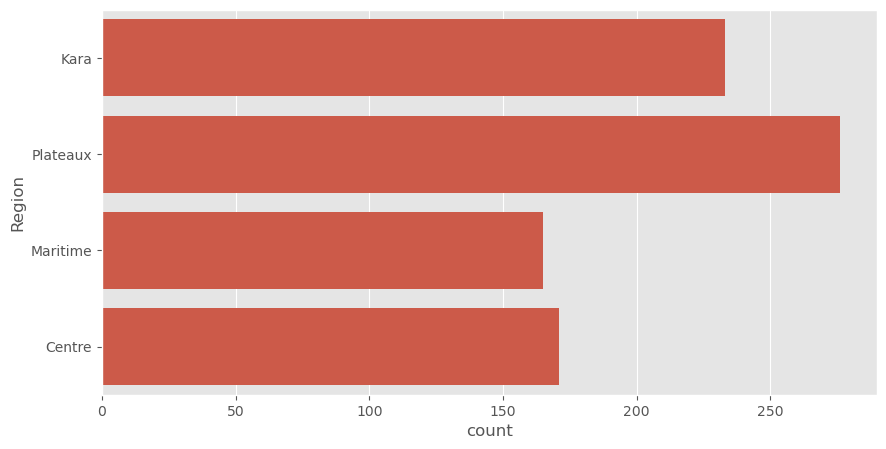

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['Region'])

<Axes: xlabel='count', ylabel='Prefecture'>

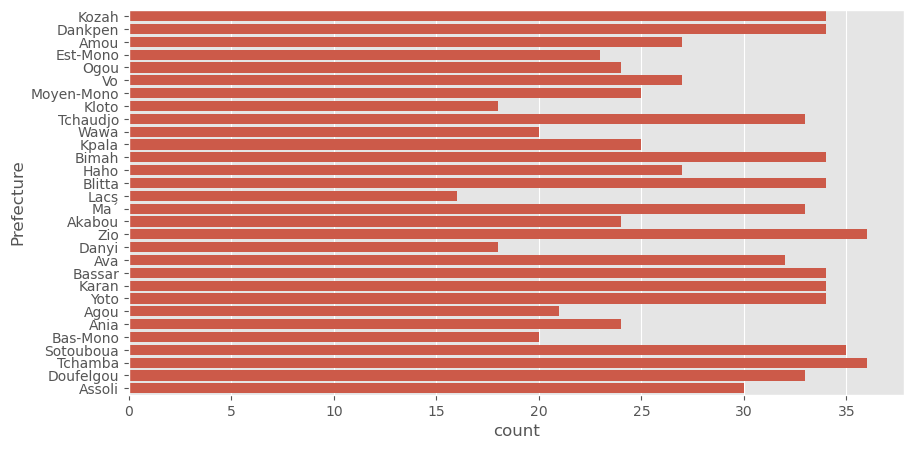

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['Prefecture'])

<Axes: xlabel='count', ylabel='Product'>

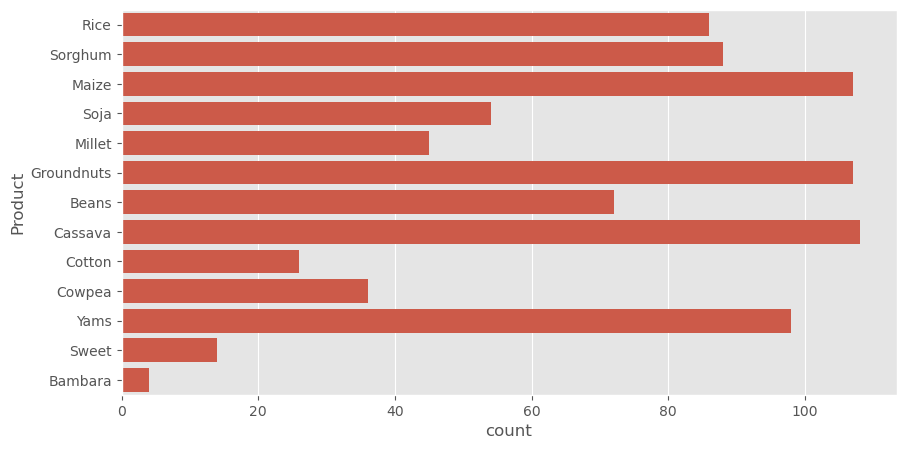

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['Product'])

In [23]:
region=df['Region'].unique()
region

array(['Kara', 'Plateaux', 'Maritime', 'Centre'], dtype=object)

In [24]:
prefecture=df['Prefecture'].unique()

In [25]:
area_per_region=[]
for reg in region:
    area_per_region.append(df[df['Region']==reg]['area_planted'].sum())

In [26]:
area_per_region

[1451456.0, 2011634.3858881092, 1436171.0, 1315587.2759999998]

Text(0.5, 1.0, 'Surface Cultive par Region')

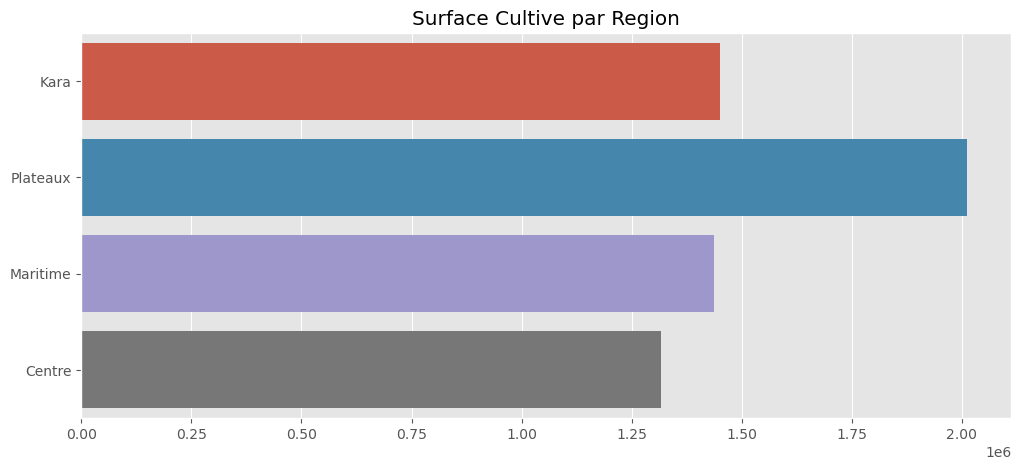

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x=area_per_region,y=region,hue=region)
plt.title('Surface Cultive par Region')


In [28]:
area_per_pref=[]
for pref in prefecture:
    area_per_pref.append(df[df['Prefecture']==pref]['area_planted'].sum())

Text(0.5, 1.0, 'Surface Cultive par prefecture')

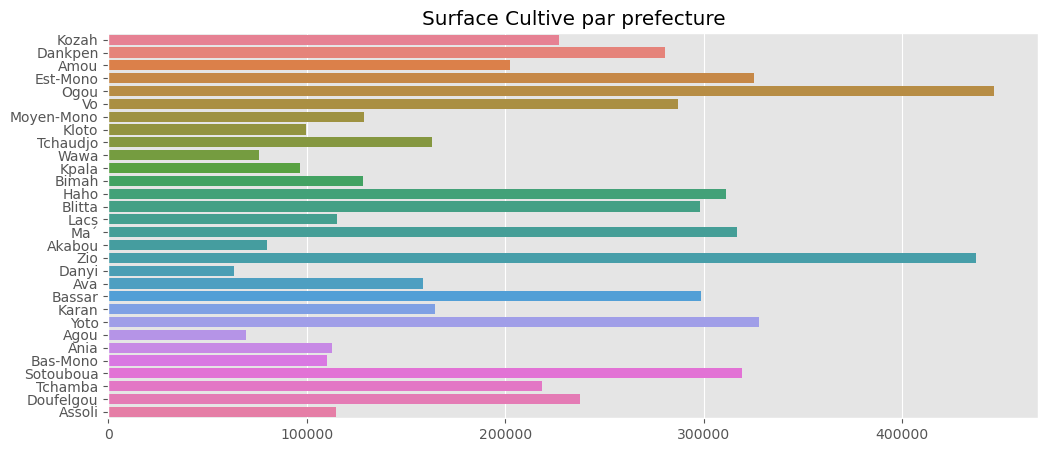

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(x=area_per_pref,y=prefecture,hue=prefecture)
plt.title('Surface Cultive par prefecture')

<Axes: ylabel='Density'>

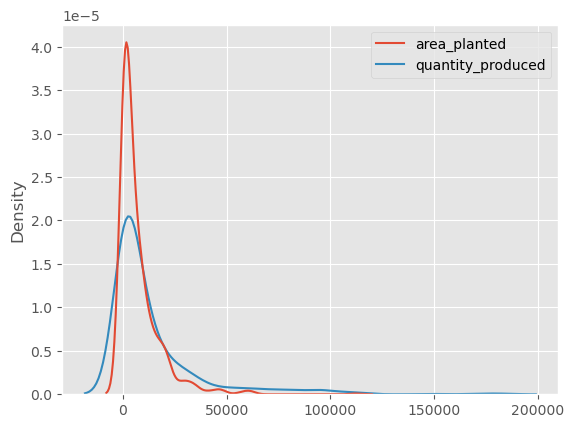

In [30]:
sns.kdeplot(df)

In [31]:
qte_prod_pref=[]
for pref in prefecture:
    qte_prod_pref.append(df[df['Prefecture']==pref]['quantity_produced'].sum())

Text(0.5, 1.0, 'Qte en tonnes produite par prefecture')

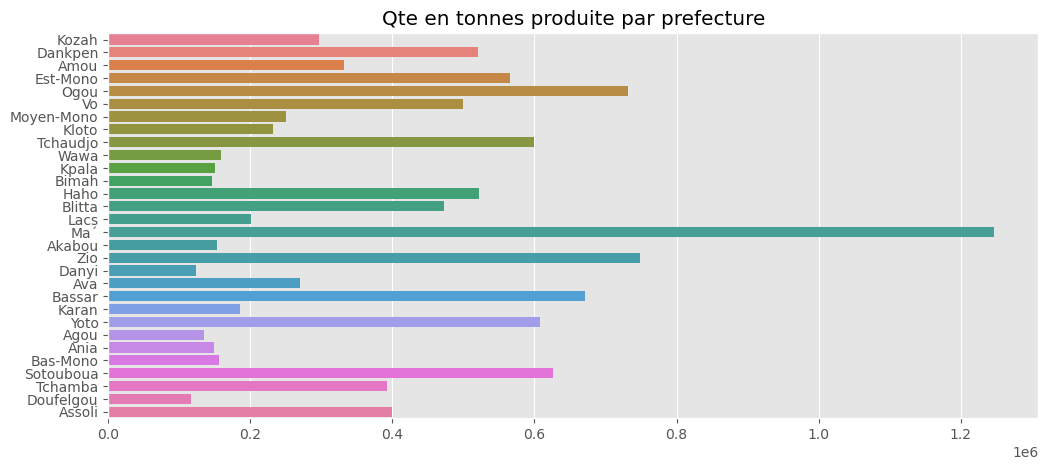

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x=qte_prod_pref,y=prefecture,hue=prefecture)
plt.title('Qte en tonnes produite par prefecture')


# 2. Preprocessing

In [33]:
from sklearn.model_selection import train_test_split 
df1=df.copy()

In [34]:
X=df1.drop('quantity_produced',axis=1)
y=df1['quantity_produced']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234, shuffle=True)

In [35]:
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

In [36]:
# fonction pour faire l'ecodogae et la normalisation des données
def process(X):
    processing=ColumnTransformer([
        ('cat',OrdinalEncoder(),['Region','Prefecture','Product']),
        ('num',RobustScaler(),['area_planted'])
    ])
    X_encoder=processing.fit_transform(X)
    return X_encoder


    

In [37]:
X_train_trans=process(X_train)

# Model

In [38]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score

In [39]:
models={'Linear Regressor': LinearRegression(),
       'Lasso' : Lasso(),
       'KNeighbors Regressor' : KNeighborsRegressor()
    
}

X_test_trans=process(X_test)

for name, model in models.items():
    model.fit(X_train_trans, y_train)
    y_pred=model.predict(X_test_trans)
    training_score=model.score(X_train_trans,y_train)
    test_score=model.score(X_test_trans, y_test)
    print(f"{name} \nTraining score : {training_score}\nTest score : {test_score} \n")

Linear Regressor 
Training score : 0.3707087083248707
Test score : 0.013900260251023533 

Lasso 
Training score : 0.37070870496169894
Test score : 0.013950874091282817 

KNeighbors Regressor 
Training score : 0.8480474803426051
Test score : 0.6851558522773351 



## Receherhe des meilleurs hypers paramètres pour le k-neighbors regressor

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
hypers_param={
    'n_neighbors':range(1,51),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}


In [42]:
grid=GridSearchCV(KNeighborsRegressor(),hypers_param, scoring='r2',cv=5)

In [48]:
grid.fit(X_train_trans, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,6


In [44]:
print(grid.best_estimator_)

KNeighborsRegressor(n_neighbors=6, weights='distance')


In [45]:
grid.best_score_

0.8749093058712113

In [46]:
best_knr=grid.best_estimator_
best_knr.fit(X_train_trans, y_train)
test_score=best_knr.score(X_test_trans, y_test)
print(test_score)
print(best_knr.score(X_train_trans, y_train))

0.7024922728105136
0.9999999940064177


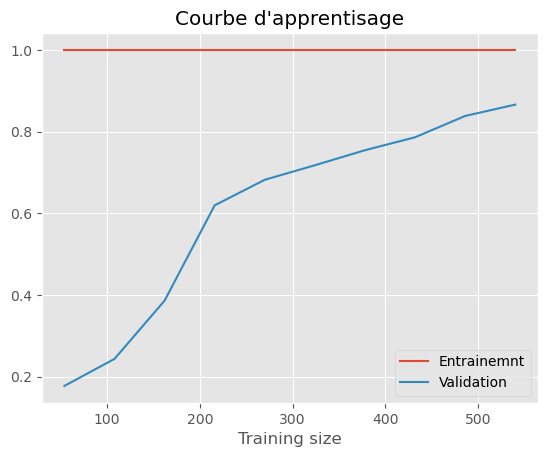

In [47]:
# Courbe d'apprentissage 
from sklearn.model_selection import learning_curve

N, t_score, v_score = learning_curve(best_knr, X_train_trans, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5,)

plt.plot(N, t_score.mean(axis=1), label="Entrainemnt")
plt.plot(N, v_score.mean(axis=1), label="Validation")
plt.xlabel('Training size')
plt.title("Courbe d'apprentisage")
plt.legend()

# Conclusion :


À l’issue de cette étude portant sur les données agricoles de 2022, j’ai construit un modèle de prédiction de la quantité de production (en tonnes) de produits agricoles au Togo.


L’analyse révèle que la région des Plateaux affiche le plus grand rendement, ce qui s’explique principalement par sa vaste superficie cultivable. Le produit le plus cultivé reste le manioc, dominant dans plusieurs localités.


J’ai expérimenté plusieurs modèles de régression, notamment le K-Neighbors Regressor, le Lasso et le Linear Regressor. Le modèle K-Neighbors s’est révélé le plus performant sur mes données. Cependant, en tentant d’optimiser davantage ses performances par le réglage des hyperparamètres, le modèle a présenté des signes d’overfitting. Ce surapprentissage pourrait s’expliquer par la limitation des données disponibles.


Je suis convaincu qu’avec un volume de données plus conséquent et mieux réparti, notamment sur la région des Savanes, il serait possible de construire un modèle plus généralisable, capable de prédire efficacement les rendements agricoles dans chaque préfecture et région du pays.


Pour mes études futures, je prévois de collaborer avec les coopératives agricoles afin d’accéder à des données plus complètes et fiables. À long terme, intégrer des variables telles que les données climatiques et la fertilité des sols permettra de développer un modèle prédictif robuste, véritable levier pour le développement agricole durable au Togo.

